<a href="https://colab.research.google.com/github/Bess-Hub/Project-Citizen-Explorer/blob/main/Brazil_Lower_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Google Colab


---

*In this exercise we will explore the data provided by the Brazilian Lower House API using Google Colab, because I had issues with Jupyter.*




# Phase 1: Data Extraction


*As any Data Analysis project we will start with Data Extraction.*


Import modules:

In [1]:
import requests # To get the API URL
import pandas as pd # To test what I am learning on my course
import xml.etree.ElementTree as ET # Because so far it is my way of reading into XML files returned by an API

Define the API URL:

In [2]:
Base_URL = requests.get(url="https://www.camara.gov.br/SitCamaraWS/Deputados.asmx/ObterDeputados")

## Some additional steps:

Check the connection:

In [3]:
print(Base_URL)

<Response [200]>


Let's check what is the data we will be working with:

In [4]:
print(Base_URL.headers.get('content-type'))

text/xml; charset=utf-8


## Visualizing the extracted data

Since the data is in XML we will use ElementTree to create a local DataFrame from the API.

In [5]:
root = ET.fromstring(Base_URL.content) # Define the root channel to the content we want to append to our lists
# Create the lists
dep_name = []
dep_id = []
dep_foto = []
dep_uf = []
dep_gender = []
dep_part = []
# Add elements to the correspondent lists
for name in root.iter('nomeParlamentar'):
    dep_name.append(name.text)
for id in root.iter('ideCadastro'):
    dep_id.append(id.text)
for urlFoto in root.iter('urlFoto'):
    dep_foto.append(urlFoto.text)
for uf in root.iter('uf'):
    dep_uf.append(uf.text)
for sexo in root.iter('sexo'):
    dep_gender.append(sexo.text)
for part in root.iter('partido'):
    dep_part.append(part.text)

Now we create one dataframe using Pandas.

In [6]:
Deputados = pd.DataFrame({'Name': dep_name, 'ID': dep_id, 'Foto': dep_foto, 'UF': dep_uf, 'Gender': dep_gender, 'Party': dep_part})

Because everything is in a certain order, if we give the folowing command we can see line by line each congressperson information in our DataFrame.

In [7]:
Deputados.head(513)

,Name,ID,Foto,UF,Gender,Party
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB
...,...,...,...,...,...,...
508,Leônidas Cristino,74299,http://www.camara.gov.br/internet/deputado/ban...,CE,masculino,PDT
509,Luciano Azevedo,103758,http://www.camara.gov.br/internet/deputado/ban...,RS,masculino,PSD
510,Gabriel Mota,224117,http://www.camara.gov.br/internet/deputado/ban...,RR,masculino,REPUBLICANOS
511,Welter,224333,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PT


We could wish to select only the first 10, for example:

In [8]:
Deputados.head(10)

,Name,ID,Foto,UF,Gender,Party
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB
5,Júlio Cesar,74317,http://www.camara.gov.br/internet/deputado/ban...,PI,masculino,PSD
6,Claudio Cajado,74537,http://www.camara.gov.br/internet/deputado/ban...,BA,masculino,PP
7,Elcione Barbalho,74075,http://www.camara.gov.br/internet/deputado/ban...,PA,feminino,MDB
8,Arlindo Chinaglia,73433,http://www.camara.gov.br/internet/deputado/ban...,SP,masculino,PT
9,Mendonça Filho,74428,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,UNIÃO


Or we could wish to select only the ones from a specific UF, for example Paraná - that is represented by its acronym PR

In [9]:
Deputados.loc[Deputados['UF'] == 'PR']

,Name,ID,Foto,UF,Gender,Party
10,Dilceu Sperafico,73768,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PP
29,Giacobo,74383,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PL
98,Zeca Dirceu,160592,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PT
111,Luiz Nishimori,162332,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSD
145,Aliel Machado,178927,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PV
146,Diego Garcia,178929,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,REPUBLICANOS
147,Luciano Ducci,178931,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSB
148,Sergio Souza,178933,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,MDB
149,Toninho Wandscheer,178934,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PP
176,Sargento Fahur,204387,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSD


We could want to verify if we have any missing data by asking for info().

In [10]:
Deputados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    513 non-null    object
 1   ID      513 non-null    object
 2   Foto    513 non-null    object
 3   UF      513 non-null    object
 4   Gender  513 non-null    object
 5   Party   513 non-null    object
dtypes: object(6)
memory usage: 24.2+ KB



Do you see how each column has the same number of elements: 513?
Knowing that there should be 513 Congresspersons, it seems that there is no missing information.



We could also request to describe the UF's, although the result should not bring any new information:
<br> 
*   There should be 513 Congresspersons.
*   Brazil has 26 UF's + the Federal District, so it should be 27 unique UF's.
*   Sao Paulo is the state with more congresspersons.
<br>
*What about those that are temporarily replacing a congressperson, would they be added to this list?*

In [11]:
Deputados['UF'].describe()

count     513
unique     27
top        SP
freq       70
Name: UF, dtype: object

But we can also want to see how they are gender classified:

In [12]:
Deputados['Gender'].value_counts()

masculino    426
feminino      87
Name: Gender, dtype: int64

And make a pie chart of it:

<Axes: ylabel='Gender'>

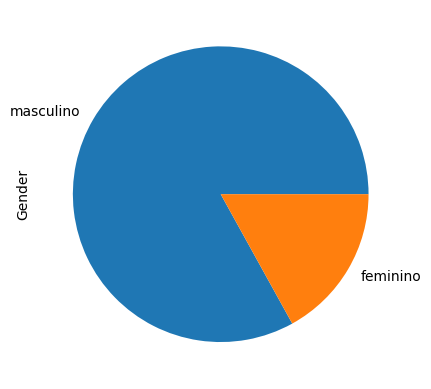

In [13]:
Deputados['Gender'].value_counts().plot(kind="pie")

This can get interesting when verifying the correlation between political party and gender, or UF and gender.

## Adding other sources of data

Let's use another endpoint to retrieve information such as the birth date and the level of studies of each congressperson. So we start by creating a list for each element.
<br><br>
The API endpoint where this information comes from has a static portion and a dynamic portion, let's have the Static portion declared:

In [14]:
bdate = []
studies = []

Static_URL = "https://dadosabertos.camara.leg.br/api/v2/deputados/"



*   The dynamic portion of the URL is the ID of each congressperson.
*   So, for every element in ID - that we will call i - we will get a specific URL (i_URL).
*   Run a requests.get on this i_URL and get the text/xml data.
*   Using ET we will get the content of the xml.
*   Now we just extract the data we want and append it to the correspondent list.

In [15]:
for i in Deputados['ID']:
    i_URL = Static_URL + str(i)
    response = requests.get(url=i_URL, headers={'Accept': 'text/xml'})
    root2 = ET.fromstring(response.content)
    for data in root2.iter('dataNascimento'):
      bdate.append(data.text)
    for info in root2.iter('escolaridade'):
      studies.append(info.text)

Just like with our previous data frame, create a dictionary that contains the values extracted. <br><br> Add the ID column so it is used as reference to join the Deputados dictionary with the new_df correctly.

In [16]:
new_df = pd.DataFrame({'ID': dep_id, 'Birthdate': bdate, 'Scolarity': studies})

In [17]:
Deputados = Deputados.join(new_df, lsuffix="_left", rsuffix="_right", how='left')

Now our Deputados dataframe is bigger!

In [ ]:
Deputados.head(513)

We do not want duplicated columns, so let's drop the ID_right column:

In [19]:
Deputados.drop('ID_right', inplace=True, axis=1)

Let's rename the ID_left column name to ID:

In [20]:
Deputados.rename(columns={"ID_left": "ID"})

,Name,ID,Foto,UF,Gender,Party,Birthdate,Scolarity
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT,1942-04-26,Superior
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD,1950-11-22,Superior
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB,1959-04-20,Superior
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB,1957-05-17,Pós-Graduação
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB,1956-03-12,Superior
...,...,...,...,...,...,...,...,...
508,Leônidas Cristino,74299,http://www.camara.gov.br/internet/deputado/ban...,CE,masculino,PDT,1957-06-03,Superior
509,Luciano Azevedo,103758,http://www.camara.gov.br/internet/deputado/ban...,RS,masculino,PSD,1969-05-24,Superior
510,Gabriel Mota,224117,http://www.camara.gov.br/internet/deputado/ban...,RR,masculino,REPUBLICANOS,1982-12-24,None
511,Welter,224333,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PT,1968-11-23,Superior


Looking way better! Let's just adjust that Birthdate column is a datetime type, not object - This will be important for the future.

In [21]:
Deputados['Birthdate'] = pd.to_datetime(Deputados['Birthdate'])

And with birth date adjusted, we can calculate the age of each congressperson.

In [22]:
age = []

from datetime import date, timedelta

for date in Deputados['Birthdate']:
  result = (date.today() - date) // timedelta(days=365.2425)
  age.append(result)

In [23]:
join_age = pd.DataFrame({'ID': dep_id, 'Age': age})

In [24]:
Deputados = Deputados.join(join_age, lsuffix="_left", rsuffix="_right", how='left')
Deputados.drop('ID_left', inplace=True, axis=1)

In [25]:
Deputados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       513 non-null    object        
 1   Foto       513 non-null    object        
 2   UF         513 non-null    object        
 3   Gender     513 non-null    object        
 4   Party      513 non-null    object        
 5   Birthdate  513 non-null    datetime64[ns]
 6   Scolarity  446 non-null    object        
 7   ID         513 non-null    object        
 8   Age        513 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 36.2+ KB


Now we can see the average age of a congressperson, the oldest and the youngest as well.

In [26]:
print("The average congressperson age is:", Deputados["Age"].mean(), "years old.")
print("The oldest congressperson age is:", Deputados["Age"].min(), "years old.")
print("The youngest congressperson age is:", Deputados["Age"].max(), "years old.")

The average congressperson age is: 50.395711500974656 years old.
The oldest congressperson age is: 22 years old.
The youngest congressperson age is: 88 years old.


In [27]:
print("This is the average age of congresspersons per political party:")
Deputados.groupby(['Party'])['Age'].mean()

This is the average age of congresspersons per political party:


Party
AVANTE           47.000000
CIDADANIA        42.750000
MDB              49.119048
NOVO             44.333333
PATRIOTA         37.750000
PCdoB            58.142857
PDT              55.294118
PL               49.767677
PODE             43.000000
PP               50.183673
PSB              51.571429
PSC              56.000000
PSD              50.404762
PSDB             54.071429
PSOL             47.461538
PT               56.102941
PV               44.500000
REDE             35.000000
REPUBLICANOS     50.261905
S.PART.          40.000000
SOLIDARIEDADE    47.200000
UNIÃO            47.728814
Name: Age, dtype: float64

In [28]:
print("This is the average age of congresspersons per State:")
Deputados.groupby(['UF'])['Age'].mean()

This is the average age of congresspersons per State:


UF
AC    50.750000
AL    46.222222
AM    43.625000
AP    47.125000
BA    54.974359
CE    49.590909
DF    53.125000
ES    48.500000
GO    54.470588
MA    45.111111
MG    48.905660
MS    53.875000
MT    45.125000
PA    52.000000
PB    53.833333
PE    46.560000
PI    51.800000
PR    49.200000
RJ    52.326087
RN    56.625000
RO    48.875000
RR    44.875000
RS    52.774194
SC    46.187500
SE    39.250000
SP    51.857143
TO    52.625000
Name: Age, dtype: float64

In [41]:
print("This is the average age of congresspersons per gender:")
ge_ag = Deputados.groupby(['Gender'])['Age'].mean()
print(ge_ag)

This is the average age of congresspersons per gender:
Gender
feminino     47.137931
masculino    51.061033
Name: Age, dtype: float64


<Axes: ylabel='Gender'>

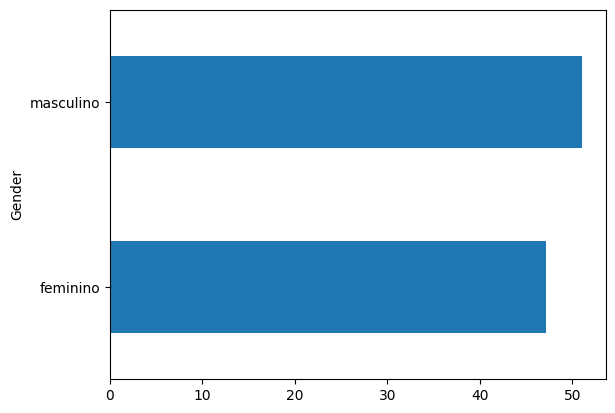

In [42]:
ge_ag.plot.barh(x='Gender', y='Age')

# Dealing with missing values

We can see how we have some missing data in the Scolarity column, all other columns has a non-null count of 513, but scolarity has 446.